In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image
import pydotplus

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier

 
from sklearn.externals.six import StringIO


In [0]:
from sklearn import tree



In [5]:
from google.colab import files
import io 
uploaded = files.upload()

Saving DecisionTree_PastHires.csv to DecisionTree_PastHires (1).csv


In [6]:
data = pd.read_csv(io.BytesIO(uploaded['DecisionTree_PastHires.csv']))
data.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [7]:
data

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N


In [8]:
data['Level of Education'].value_counts()

BS     7
PhD    4
MS     2
Name: Level of Education, dtype: int64

In [0]:
d1={'Y':1, 'N':0}
d2={'BS' : 1, 'MS':2, 'PhD':3}
data['Employed?']=data['Employed?'].map(d1)
data['Top-tier school']=data['Top-tier school'].map(d1)
data['Interned']=data['Interned'].map(d1)
data['Level of Education']=data['Level of Education'].map(d2)
data['Hired']=data['Hired'].map(d1)

In [10]:
data.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,1,0,0,1
1,0,0,0,1,1,1,1
2,7,0,6,1,0,0,0
3,2,1,1,2,1,0,1
4,20,0,2,3,1,0,0


In [0]:
model = RandomForestClassifier(n_estimators=100, random_state=15)


In [0]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [20]:
model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=15, verbose=0,
                       warm_start=False)

In [0]:
y_pred = model.predict(X_test)

In [22]:
print('accuracy : ', metrics.accuracy_score(y_test, y_pred))

accuracy :  0.6666666666666666


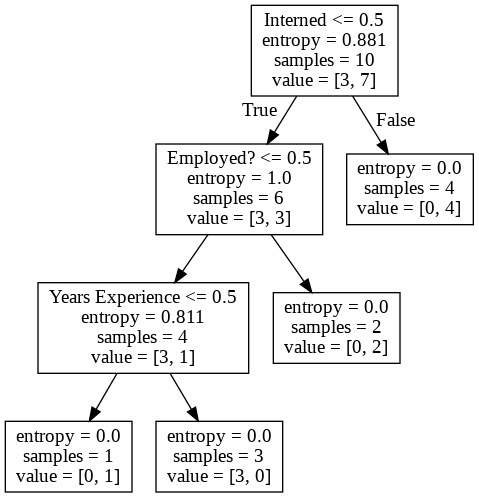

In [16]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())